In [2]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
import numpy as np
import torch
import torchvision.utils as vutils
from matplotlib import pyplot as plt
from IPython import display
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
from PIL import Image

In [3]:
# For both cpu and gpu integration all the variables and models should use
# "xx.to(device)"  
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Basic parameters for reproducablity
torch.manual_seed(1)
np.random.seed(1)
if device == "cuda:0": 
    torch.cuda.manual_seed_all(1) # gpu vars
# Dataset paths
celea_dataset = "Dataset/HIGH/celea_60000_SFD"
sr_dataset = "Dataset/HIGH/SRtrainset_2"
vgg_dataset = "Dataset/HIGH/vggface2/vggcrop_train"



In [22]:
def batch_to_image(batch):
    np_grid = vutils.make_grid(batch).numpy()
    plt.imshow(np.transpose(np_grid, (1,2,0)), interpolation='nearest')

In [4]:
# Dataset for high images
def load_image(path):
    return Image.open(path)

# This dataset use the image datasets where images
# are located on the dataset folder and this
# Generic dataset should be customized according to the dataset
# csv based dataset require different loading function

class HighDataset(Dataset):
    """ Initialize the dataset by giving the dataset path and transform that will be applied """
    def __init__(self,transform = None):
        images = []
        celea_subjects = [subject for subject in os.listdir(celea_dataset)]
        sr_subjects = [subject for subject in os.listdir(sr_dataset)]
        vgg_subjects = [subject for subject in os.listdir(vgg_dataset)]
        
        for subject in celea_subjects:
            images.append(os.path.join(celea_dataset,subject))

        for subject in sr_subjects:
            images.append(os.path.join(celea_dataset,subject))
                              
        for subject in celea_subjects:
            images.append(os.path.join(celea_dataset,subject))
        
                              
        self.images = images
        self.transform = transform
        self.count = len(images)
        

    """ Image with given index will be loaded by using the image path """
    def __getitem__(self, index):
        image_path = self.images[index]
        image = load_image(image_path)
        if self.transform is not None:
            image = self.transform(image)

        return image

    def __len__(self):
        return self.count

In [16]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = HighDataset(transform)
data_loader = DataLoader(dataset,batch_size = 8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


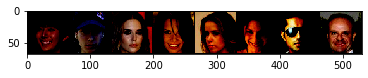

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


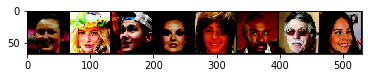

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


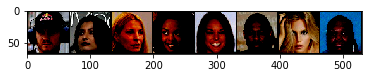

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


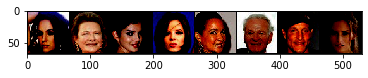

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


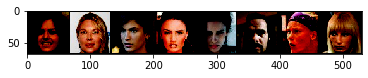

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


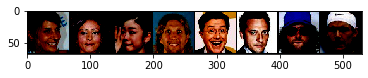

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


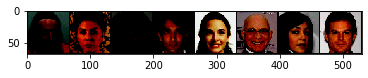

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


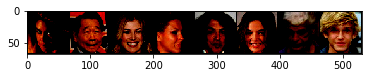

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


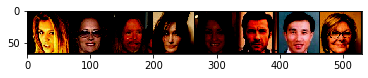

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


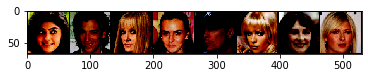

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


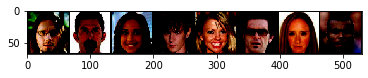

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


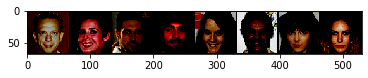

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


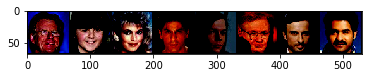

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


KeyboardInterrupt: 